In [1]:
import pandas as pd

In [2]:
bur_bal = pd.read_csv('../data/bureau_balance.csv')

In [3]:
print('bur_bal shape:', bur_bal.shape)

bur_bal shape: (27299925, 3)


In [4]:
#bur_bal.head(20)

In [5]:
#bur_bal.groupby(['SK_ID_BUREAU','STATUS'])[['MONTHS_BALANCE']].count()

In [6]:
#bur_bal.merge(right=bur_cnt['MONTHS_BALANCE'].reset_index(),how='left', on='SK_ID_BUREAU')

In [7]:
#burcnts = bur_bal['MONTHS_BALANCE'].groupby(bur_bal['STATUS']).count()

In [8]:
#bur_bal.groupby(['SK_ID_BUREAU','STATUS'])['MONTHS_BALANCE'].count()

In [9]:
#bur_bal.isnull().sum()

In [10]:
#burcnts.head()

In [11]:
#bur_bal['bur_cnt'] = bur_bal['STATUS'].map(burcnts['MONTHS_BALANCE'])

In [12]:
#bur_bal.head(100)

In [13]:
print('transform to dummies')
bur_bal = pd.concat([bur_bal, pd.get_dummies(bur_bal.STATUS, prefix='bur_bal_status')],
                    axis=1).drop('STATUS',axis=1)

transform to dummies


In [14]:
bur_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,bur_bal_status_0,bur_bal_status_1,bur_bal_status_2,bur_bal_status_3,bur_bal_status_4,bur_bal_status_5,bur_bal_status_C,bur_bal_status_X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0


In [15]:
print('counting bur_bal')
bur_cnts = bur_bal[['SK_ID_BUREAU', 'MONTHS_BALANCE']].groupby('SK_ID_BUREAU').count()
bur_cnts.head()

counting bur_bal


,MONTHS_BALANCE
SK_ID_BUREAU,
5001709,97
5001710,83
5001711,4
5001712,19
5001713,22


In [16]:
bur_bal['bur_cnt'] = bur_bal['SK_ID_BUREAU'].map(bur_cnts['MONTHS_BALANCE'])

In [17]:
bur_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,bur_bal_status_0,bur_bal_status_1,bur_bal_status_2,bur_bal_status_3,bur_bal_status_4,bur_bal_status_5,bur_bal_status_C,bur_bal_status_X,bur_cnt
0,5715448,0,0,0,0,0,0,0,1,0,27
1,5715448,-1,0,0,0,0,0,0,1,0,27
2,5715448,-2,0,0,0,0,0,0,1,0,27
3,5715448,-3,0,0,0,0,0,0,1,0,27
4,5715448,-4,0,0,0,0,0,0,1,0,27


In [18]:
print('average bur_bal')
avg_bur_bal = bur_bal.groupby('SK_ID_BUREAU').mean()

average bur_bal


In [19]:
avg_bur_bal.head()

,MONTHS_BALANCE,bur_bal_status_0,bur_bal_status_1,bur_bal_status_2,bur_bal_status_3,bur_bal_status_4,bur_bal_status_5,bur_bal_status_C,bur_bal_status_X,bur_cnt
SK_ID_BUREAU,,,,,,,,,,
5001709,-48.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,97.0
5001710,-41.0,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,83.0
5001711,-1.5,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,4.0
5001712,-9.0,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,19.0
5001713,-10.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,22.0


In [20]:
import gc

In [21]:
avg_bur_bal.columns = ['avg_bur_' + f_ for f_ in avg_bur_bal.columns]
del bur_bal
gc.collect()

235

In [22]:
avg_bur_bal.head()

,avg_bur_MONTHS_BALANCE,avg_bur_bur_bal_status_0,avg_bur_bur_bal_status_1,avg_bur_bur_bal_status_2,avg_bur_bur_bal_status_3,avg_bur_bur_bal_status_4,avg_bur_bur_bal_status_5,avg_bur_bur_bal_status_C,avg_bur_bur_bal_status_X,avg_bur_bur_cnt
SK_ID_BUREAU,,,,,,,,,,
5001709,-48.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,97.0
5001710,-41.0,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,83.0
5001711,-1.5,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,4.0
5001712,-9.0,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,19.0
5001713,-10.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,22.0


In [23]:
avg_bur_bal.iloc[0]

avg_bur_MONTHS_BALANCE     -48.000000
avg_bur_bur_bal_status_0     0.000000
avg_bur_bur_bal_status_1     0.000000
avg_bur_bur_bal_status_2     0.000000
avg_bur_bur_bal_status_3     0.000000
avg_bur_bur_bal_status_4     0.000000
avg_bur_bur_bal_status_5     0.000000
avg_bur_bur_bal_status_C     0.886598
avg_bur_bur_bal_status_X     0.113402
avg_bur_bur_cnt             97.000000
Name: 5001709, dtype: float64

In [24]:
#avg_bur_bal.head()

In [25]:
#bur_bal.head()

In [26]:
print('read bureau')
bur = pd.read_csv('../data/bureau.csv')

read bureau


In [27]:
bur['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [28]:
bur['CREDIT_CURRENCY'].unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
      dtype=object)

In [29]:
bur['CREDIT_TYPE'].unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

In [30]:
print('Go to dummies')
bur_credit_activate_dum = pd.get_dummies(bur.CREDIT_ACTIVE, prefix='ca_')
bur_credit_currency_dum = pd.get_dummies(bur.CREDIT_CURRENCY, prefix='cu_')
bur_credit_type_dum = pd.get_dummies(bur.CREDIT_TYPE, prefix='ty_')

bur_full = pd.concat([bur, bur_credit_activate_dum, bur_credit_currency_dum, bur_credit_type_dum], axis=1)
del bur_credit_activate_dum, bur_credit_currency_dum, bur_credit_type_dum
gc.collect()

Go to dummies


21

In [31]:
print('merge with bur avg')
bur_full = bur_full.merge(right=avg_bur_bal.reset_index(),how='left', on='SK_ID_BUREAU', suffixes=('','_bur_bal'))

merge with bur avg


In [32]:
bur_full.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,avg_bur_MONTHS_BALANCE,avg_bur_bur_bal_status_0,avg_bur_bur_bal_status_1,avg_bur_bur_bal_status_2,avg_bur_bur_bal_status_3,avg_bur_bur_bal_status_4,avg_bur_bur_bal_status_5,avg_bur_bur_bal_status_C,avg_bur_bur_bal_status_X,avg_bur_bur_cnt
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#bur_full.head()

In [34]:
print('counting bur per SK_ID_CURR')
nb_bureau_per_curr = bur_full[['SK_ID_CURR', 'SK_ID_BUREAU']].groupby('SK_ID_CURR').count()
bur_full['SK_ID_BUREAU'] = bur_full['SK_ID_CURR'].map(nb_bureau_per_curr['SK_ID_BUREAU'])

counting bur per SK_ID_CURR


In [35]:
#bur_full.head()

In [36]:
print('averaging bureau')
avg_bur = bur_full.groupby('SK_ID_CURR').mean()

averaging bureau


In [37]:
#avg_bur.head()

In [38]:
del bur, bur_full

In [39]:
gc.collect()

323

In [40]:
print('read prev')
prev = pd.read_csv('../data/previous_application.csv')

prev_cat_feature = [f_ for f_ in prev.columns if prev[f_].dtype == 'object']

read prev


In [41]:
print('go to dummies')
prev_dum = pd.DataFrame()
for f_ in prev_cat_feature:
    prev_dum = pd.concat([prev_dum, pd.get_dummies(prev[f_], prefix=f_)], axis=1)
    
prev = pd.concat([prev, prev_dum], axis=1)
del prev_dum
gc.collect()

go to dummies


63

In [42]:
#prev.head()

In [43]:
print('counting number of prev')
nb_prev_per_curr = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
prev['SK_ID_PREV'] = prev['SK_ID_CURR'].map(nb_prev_per_curr['SK_ID_PREV'])

counting number of prev


In [44]:
print('averaging prev')
avg_prev = prev.groupby('SK_ID_CURR').mean()
del prev
gc.collect()

averaging prev


42

In [45]:
#avg_prev.head()

In [46]:
print('reading pos_cash')
pos = pd.read_csv('../data/POS_CASH_balance.csv')

reading pos_cash


In [47]:
print('go to dummies')
pos = pd.concat([pos, pd.get_dummies(pos['NAME_CONTRACT_STATUS'])], axis=1)

go to dummies


In [48]:
print('compute nb of prevs per curr')
nb_prevs = pos[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pos['SK_ID_PREV'] = pos['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

compute nb of prevs per curr


In [49]:
print('go to averages')
avg_pos = pos.groupby('SK_ID_CURR').mean()

go to averages


In [50]:
del pos, nb_prevs
gc.collect()

72

In [51]:
print('reading cc balance')
cc_bal = pd.read_csv('../data/credit_card_balance.csv')

reading cc balance


In [52]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [53]:
cc_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [54]:
print('go to dummies')
cc_bal = pd.concat([cc_bal, pd.get_dummies(cc_bal['NAME_CONTRACT_STATUS'], prefix='cc_bal_status_')], axis=1)

nb_prevs = cc_bal[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
cc_bal['SK_ID_PREV'] = cc_bal['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

go to dummies


In [55]:
print('compute average')
avg_cc_bal = cc_bal.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]
del cc_bal, nb_prevs
gc.collect()

compute average


199

In [56]:
print('reading installments')
inst = pd.read_csv('../data/installments_payments.csv')
nb_prevs = inst[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
inst['SK_ID_PREV'] = inst['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

avg_inst = inst.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['inst_' + f_ for f_ in avg_inst.columns]

reading installments


In [57]:
print('read train and test')
train = pd.read_csv('../data/application_train.csv')
test = pd.read_csv('../data/application_test.csv')
print('shape:', train.shape, test.shape)

read train and test
shape: (307511, 122) (48744, 121)


In [58]:
y = train['TARGET']
del train['TARGET']


In [59]:
categorical_feats = [f for f in train.columns if train[f].dtype == 'object']
categorical_feats

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [60]:
for f_ in categorical_feats:
    train[f_], indexer = pd.factorize(train[f_])
    test[f_] = indexer.get_indexer(test[f_])    

In [61]:
train = train.merge(right = avg_bur.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right = avg_bur.reset_index(), how='left', on='SK_ID_CURR')

train = train.merge(right = avg_prev.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right = avg_prev.reset_index(), how='left', on='SK_ID_CURR')

train = train.merge(right = avg_pos.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right = avg_pos.reset_index(), how='left', on='SK_ID_CURR')

train = train.merge(right = avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right = avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

train = train.merge(right = avg_inst.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right = avg_inst.reset_index(), how='left', on='SK_ID_CURR')

In [62]:
del avg_bur, avg_prev
gc.collect()

63

In [63]:
import numpy as np
from sklearn.metrics import roc_auc_score, precision_recall_curve,roc_curve, average_precision_score
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [64]:
def train_model(train_,test_,y_,folds_):
    oof_preds = np.zeros(train_.shape[0])
    sub_preds = np.zeros(test_.shape[0])
    
    feature_importance_df = pd.DataFrame()
    
    feats = [f for f in train_.columns if f not in ['SK_ID_CURR']]
    
    for n_fold, (trn_idx, val_idx) in enumerate(folds_.split(train_)):
        trn_x, trn_y = train[feats].iloc[trn_idx], y_.iloc[trn_idx]
        val_x, val_y = train[feats].iloc[val_idx], y_.iloc[val_idx]
        
        clf = LGBMClassifier(
            n_estimator = 4000,
            learning_rate = 0.03,
            num_leaves = 30,
            colsample_bytree=.8,
            subsample=.9,
            max_depth=7,
            reg_alpha=.1,
            min_split_gain=.01,
            min_child_weight=2,
            silent=-1,
            verbose=-1
        )
        
        clf.fit(trn_x, trn_y,
               eval_set=[(trn_x, trn_y), (val_x, val_y)],
               eval_metric='auc',verbose=100,early_stopping_rounds=100
               )
        
        oof_preds[val_idx] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_[feats], num_iteration=clf.best_iteration_)[:, 1] / folds_.n_splits
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df['feature'] = feats
        fold_importance_df['importance'] = clf.feature_importances_
        fold_importance_df['fold'] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis = 0)
        
        print('fold %2d AUC %.6f'%(n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
        del clf, trn_x, trn_y, val_x, val_y
        gc.collect()
        
    print('full auc score %.6f'%roc_auc_score(y, oof_preds))
    
    test_['TARGET'] = sub_preds
    
    return oof_preds, test_[['SK_ID_CURR', 'TARGET']], feature_importance_df



        

In [65]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[['feature', 'importance']].groupby('feature').mean().sort_values(by='importance', ascending=False)[:50].index
    
    best_features = feature_importance_df_[feature_importance_df_.feature.isin(cols)]
    
    plt.figure(figsize=(8,10))
    sns.barplot(x='importance', y='feature',
               data = best_features.sort_values(by='importance', ascending=False))
    plt.title('LightGBM Feature (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances.png')
    
    

In [66]:
def display_roc_curve(y_, oof_preds_,folds_idx_):
    plt.figure(figsize=(6,6))
    scores = []
    for n_fold,(_, val_idx) in enumerate(folds_idx_):
        
        fpr, tpr, thresholds = roc_curve(y_.iloc[val_idx], oof_preds_[val_idx])
        score = roc_auc_score(y_.iloc[val_idx], oof_preds_[val_idx])
        scores.append(score)
        
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %.4f)'%(n_fold+1, score))
        
    plt.plot([0,1],[0,1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
    fpr, tpr, thresholds = roc_curve(y_, oof_preds_)
    score = roc_auc_score(y_, oof_preds_)
    plt.plot(fpr, tpr, color='b',
            label='Avg ROC(AUC = %.4f $\pm$ %.4f)' %(score, np.std(scores)),
            lw=2, alpha=.8)
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('LightGBM ROC Curve')
    plt.legend(loc = 'lower right')
    plt.tight_layout()
    
    plt.savefig('roc_curve.png')

In [67]:
def display_precision_recall(y_, oof_preds_, folds_idx_):
    
    plt.figure(figsize=(6,6))
    
    scores = []
    for n_fold,(_, val_idx) in enumerate(folds_idx_):
        
        fpr, tpr, thresholds = precision_recall_curve(y_.iloc[val_idx], oof_preds_[val_idx])
        score = average_precision_score(y_.iloc[val_idx], oof_preds_[val_idx])
        scores.append(score)
        
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %.4f)'%(n_fold+1, score))
        
    plt.plot([0,1],[0,1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
    fpr, tpr, thresholds = precision_recall_curve(y_, oof_preds_)
    score = average_precision_score(y_, oof_preds_)
    plt.plot(fpr, tpr, color='b',
            label='Avg ROC(AUC = %.4f $\pm$ %.4f)' %(score, np.std(scores)),
            lw=2, alpha=.8)
    #$\pm$ means +-
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('LightGBM Recall / precision')
    plt.legend(loc = 'best')
    plt.tight_layout()
    
    plt.savefig('recall_precison_curve.png')
    

In [68]:
gc.enable()
#train, test, y = build_model_input()

In [69]:
from sklearn.model_selection import KFold

In [70]:
folds = KFold(n_splits=5, shuffle=True, random_state=546789)
oof_preds, test_preds, importances = train_model(train, test, y, folds)
test_preds.to_csv('first_submission.csv', index=False)



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.764068	valid_1's auc: 0.749189
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.764068	valid_1's auc: 0.749189
fold  1 AUC 0.749189
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.763827	valid_1's auc: 0.753198
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.763827	valid_1's auc: 0.753198
fold  2 AUC 0.753198
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.762226	valid_1's auc: 0.749683
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.762226	valid_1's auc: 0.749683
fold  3 AUC 0.749683
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.763701	valid_1's auc: 0.752287
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.763701	valid_1's auc: 0.752287
fold  4 AUC 0.752287
Training until validation scores

In [71]:
folds_idx = [(trn_idx, val_idx) for trn_idx, val_idx in folds.split(train)]
display_importances(feature_importance_df_=importances)

In [72]:
display_roc_curve(y_=y, oof_preds_=oof_preds, folds_idx_=folds_idx)

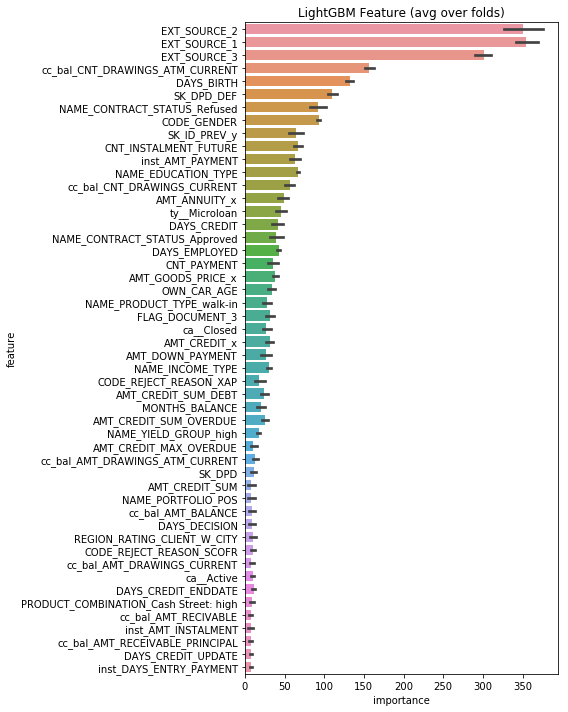

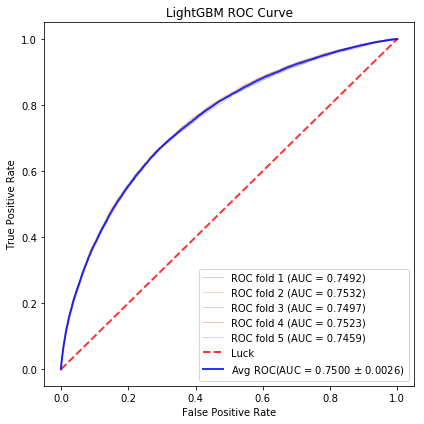

In [73]:
plt.show()

In [74]:
display_precision_recall(y_=y, oof_preds_=oof_preds, folds_idx_=folds_idx)

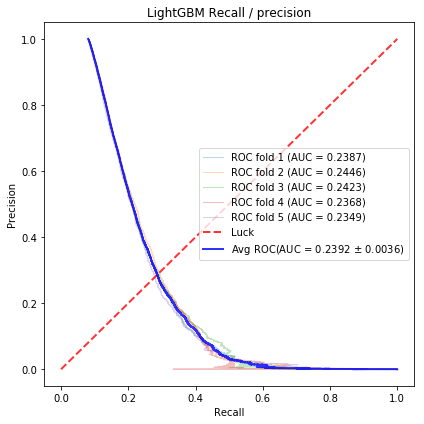

In [75]:
plt.show()

In [78]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,ca__Active,ca__Bad debt,ca__Closed,ca__Sold,cu__currency 1,cu__currency 2,cu__currency 3,cu__currency 4,ty__Another type of loan,ty__Car loan,ty__Cash loan (non-earmarked),ty__Consumer credit,ty__Credit card,ty__Interbank credit,ty__Loan for business development,ty__Loan for purchase of shares (margin lending),ty__Loan for the purchase of equipment,ty__Loan for working capital replenishment,ty__Microloan,ty__Mobile operator loan,ty__Mortgage,ty__Real estate loan,ty__Unknown type of loan,avg_bur_MONTHS_BALANCE,avg_bur_bur_bal_status_0,avg_bur_bur_bal_status_1,avg_bur_bur_bal_status_2,avg_bur_bur_bal_status_3,avg_bur_bur_bal_status_4,avg_bur_bur_bal_status_5,avg_bur_bur_bal_status_C,avg_bur_bur_bal_status_X,avg_bur_bur_cnt,SK_ID_PREV_x,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FLAG_LAST_APPL_PER_CONTRACT_N,FLAG_LAST_APPL_PER_CONTRACT_Y,NAME_CASH_LOAN_PURPOSE_Building a house

In [80]:
train.columns.shape

(380,)

In [81]:
train['AMT_CREDIT_x'].head()

0     406597.5
1    1293502.5
2     135000.0
3     312682.5
4     513000.0
Name: AMT_CREDIT_x, dtype: float64

In [84]:
s = '12132'
s.reverse()

AttributeError: 'str' object has no attribute 'reverse'

In [91]:
list1 = list(str(abs(-123)))

In [93]:
list1.reverse()

In [94]:
list1

['3', '2', '1']

In [97]:
x = 123
str_ = str(abs(x))
print(str_)

123


In [98]:
str_ = list(str_)
print(str_)

['1', '2', '3']


In [102]:
str_.reverse()

AttributeError: 'NoneType' object has no attribute 'reverse'

In [103]:
print(str_)

None
